## Лабораторная работа 2. Введение в машинное обучение.

Результат лабораторной работы − отчет. Мы принимаем отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание 
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. 

## Данные


В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем прочитать его до конца.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные, можно вывести несколько первых строк на экран.

In [2]:
data = pd.read_csv('data.adult.csv')

In [3]:
data.head(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
5,18,Private,446771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,<=50K
6,31,Federal-gov,108464,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,<=50K


Иногда в данных встречаются пропуски. Как задаются пропуски, обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

нашли

In [4]:
data = data.replace('?', np.nan)

In [5]:
data.isnull().sum()

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64

In [6]:
data.shape

(16280, 14)

удалили)

In [7]:
data.dropna(inplace = True)
data.shape

(15347, 14)

In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

Обычно после загрузки датасета необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', '>50K,<=50K'],
      dtype='object')

после удаления нанов сделает ресет индексов

In [10]:
data.reset_index(inplace = True)
data.drop(['index'],inplace = True, axis = 1)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [11]:
# перекодируем target в числовое поле
data.at[data['>50K,<=50K'] == '<=50K', '>50K,<=50K'] = 0
data.at[data['>50K,<=50K'] == '>50K', '>50K,<=50K'] = 1
data['>50K,<=50K'] = data['>50K,<=50K'].apply(np.int)
y = np.array(data['>50K,<=50K'])
len(y)


15347

In [12]:
data.drop(['>50K,<=50K'],axis = 1, inplace = True)
data.shape

(15347, 13)

In [13]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40


In [14]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object

In [15]:
# выделим в выборках категориальные и числовые поля
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
numerical_columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

можно использовать kFOld и по циклу обучать модель с разными параметрами, сохранять результаты в массивы, но намного проще использовать внутренний параметр  GridSearchCV'а cv=5(integer, to specify the number of folds in a (Stratified)KFold)

In [16]:
from sklearn.cross_validation import KFold
kf = KFold(data.shape[0],5)
for train_index, test_index in kf:
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = data.loc[train_index], data.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: 12277 TEST: 3070
TRAIN: 12277 TEST: 3070
TRAIN: 12278 TEST: 3069
TRAIN: 12278 TEST: 3069
TRAIN: 12278 TEST: 3069


# kNN

буду строить доверительный интервал в 1 стандартное отклонение

Best params: {'n_neighbors': 4}
Best cross validaton score 0.640716052871


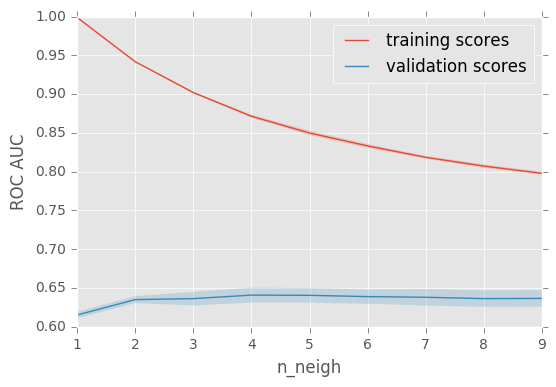

In [17]:
parameters = {'n_neighbors':np.arange(1,10,1)}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, cv = 5,scoring='roc_auc')
clf.fit(data[numerical_columns], y)

def plot_with_err(x, data, **kwargs):
    mu = clf.cv_results_['mean_'+data+'_score']
    std = clf.cv_results_['std_'+data+'_score']
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(np.array(clf.cv_results_['param_n_neighbors'].data,dtype = int), 'train',  label='training scores')
plot_with_err(np.array(clf.cv_results_['param_n_neighbors'].data,dtype = int), 'test',  label='validation scores')
plt.xlabel('n_neigh')
plt.ylabel('ROC AUC')
plt.legend()

print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

# DesicionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier

Best params: {'max_depth': 7}
Best cross validaton score 0.841456219488


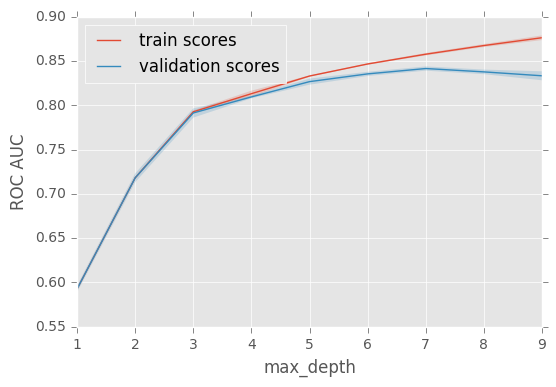

In [19]:
parameters = {'max_depth':np.arange(1,10,1)}
decis = DecisionTreeClassifier(random_state=7)
clf = GridSearchCV(decis, parameters, cv = 5,scoring='roc_auc')
clf.fit(data[numerical_columns], y)

def plot_with_err(x, data, **kwargs):
    mu = clf.cv_results_['mean_'+data+'_score']
    std = clf.cv_results_['std_'+data+'_score']
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(np.array(clf.cv_results_['param_max_depth'].data,dtype = int), 'train', label='train scores')
plot_with_err(np.array(clf.cv_results_['param_max_depth'].data,dtype = int), 'test',  label='validation scores')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.legend(loc='best')

print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

# SGDClassifier

In [25]:
from sklearn import linear_model
import matplotlib.ticker as ticker

Best params: {'loss': 'modified_huber'}
Best cross validaton score 0.604463616241


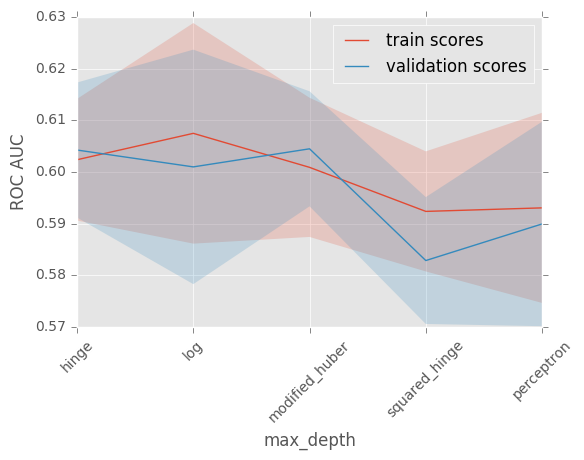

In [22]:
parameters = {'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
sgd = linear_model.SGDClassifier()
clf = GridSearchCV(sgd, parameters, cv = 5,scoring='roc_auc')
clf.fit(data[numerical_columns], y)

def plot_with_err(x, data, **kwargs):
    mu = clf.cv_results_['mean_'+data+'_score']
    std = clf.cv_results_['std_'+data+'_score']
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(np.arange(len(list(clf.cv_results_['param_loss'].data))), 'train', label = 'train scores')
plot_with_err(np.arange(len(list(clf.cv_results_['param_loss'].data))), 'test',  label='validation scores')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.xticks(range(len(list(clf.cv_results_['param_loss'].data))), list(clf.cv_results_['param_loss'].data), rotation=45)
plt.legend(loc = 'best')


print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

Что вы можете сказать о получившихся графиках?

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

видим что когда на train оверфитимся, то на test качество плохое, но когда начинаем недофичиваемся(underfitting), то качество на test падает. 
На последнем графике огромный разброс по сравнению с остальными.
Так же на валидации дисперсия больше
Качество достаточно изменяется при изменении параметров, а значит поиск параметров важная задача

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [24]:
from sklearn.cross_validation import KFold
kf = KFold(data.shape[0],5)
n = 200
rf = RandomForestClassifier(n_estimators=n, n_jobs=4, random_state = 7)
res_test = np.zeros(5*n).reshape((n,5))
res_train = np.zeros(5*n).reshape((n,5))
k = 0
for train_index, test_index in kf:
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = data.loc[train_index][numerical_columns], data.loc[test_index][numerical_columns]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    yp_train = np.zeros(len(y_train))
    yp_test = np.zeros(len(y_test))
    for i in range(n):
        yp_train = yp_train + rf.estimators_[i].predict(X_train)
        yp_test = yp_test + rf.estimators_[i].predict(X_test)
        res_train[i,k] = roc_auc_score(y_train, yp_train)
        res_test[i,k] = roc_auc_score(y_test, yp_test)
    k = k + 1

TRAIN: 12277 TEST: 3070
TRAIN: 12277 TEST: 3070
TRAIN: 12278 TEST: 3069
TRAIN: 12278 TEST: 3069
TRAIN: 12278 TEST: 3069


Best params: 200
Best cross validaton score 0.818905407547


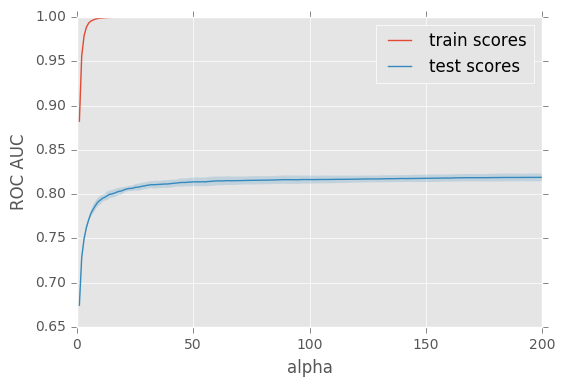

In [25]:
n_est = np.arange(1,n+1)
def plot_with_err(x, data, **kwargs):
    mu = data.mean(axis = 1)
    std = data.std(axis = 1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(n_est, res_train, label='train scores')
plot_with_err(n_est, res_test,  label='test scores')
plt.xlabel('alpha')
plt.ylabel('ROC AUC')
plt.legend(loc='best')

print("Best params:", n_est[res_test.mean(axis = 1).argmax()])
print("Best cross validaton score", res_test.mean(axis = 1).max())

видим,что примерно с 75 деревьев качество почти перестает улучшаться,то буду считать значение 100 оптимальным, так как наша выборка будет не 80% для итогового предсказания, а 100% от изначальной, поэтому оптимальное число деревьев увеличиваю

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество, давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

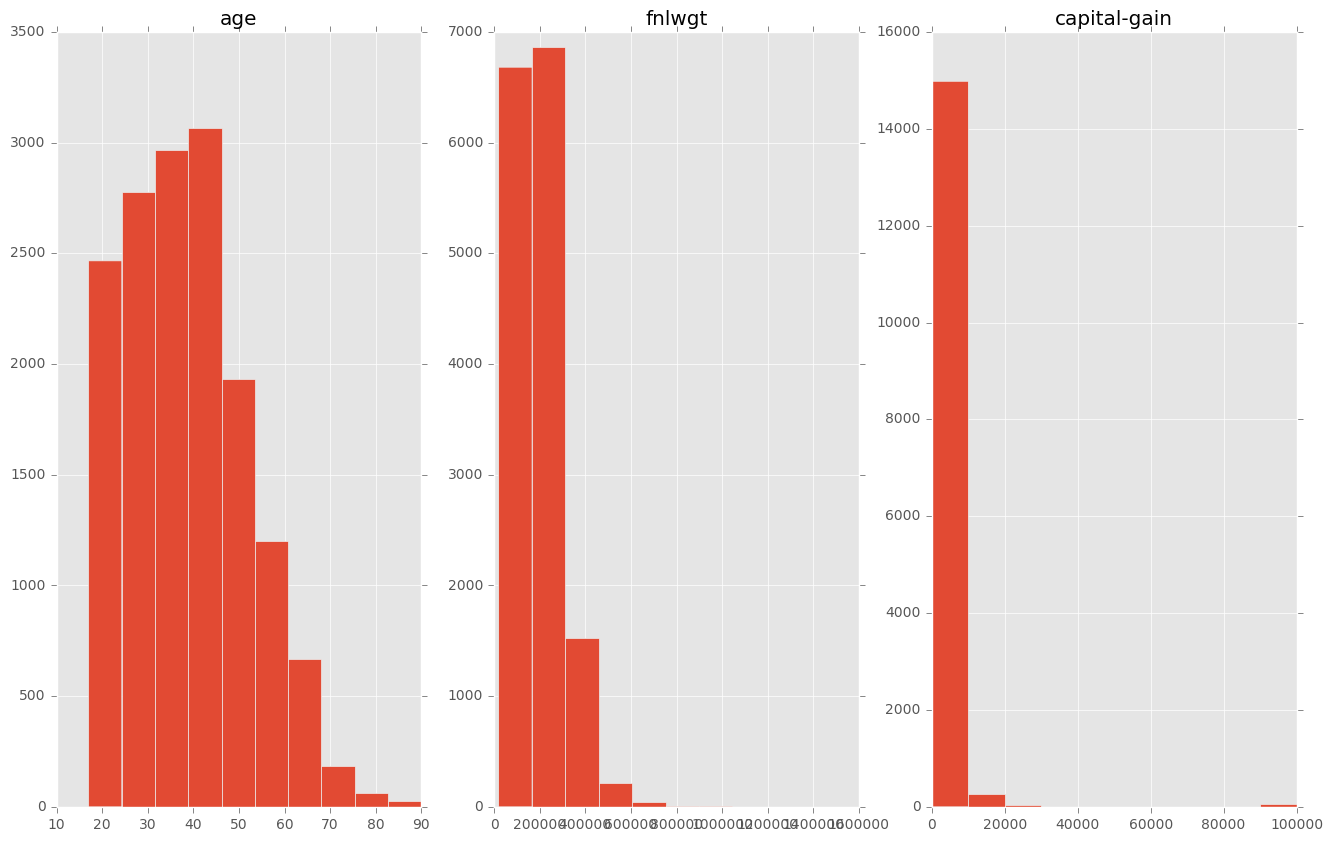

In [26]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
i=0
for col in  ['age','fnlwgt','capital-gain']:
    axes[i].set_title(str(col))
    data[col].hist(ax=axes[i])
    i = i +1

**(0.5 балла)** Глядя на получившиеся графики, объясните, в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

По графикам видно, что у двух переменных есть очень большие значения. По сравнению с ними возраст очень мал.
Величины переменных могут повлиять на алгоритмы основанные на метрике. Например kNN, если использовать евклидову метрику, то возраст почти не будет влиять на дистанцию до соседей. Масштабирование должно улучшить качество модели.
Также поможет и SGD, потому что при больших значениях скалярного произведения (w,x_i) производная функции активации в алгоритме равна почти нулю, в связи с этим вектор весов w почти перестает меняться.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [19]:
from sklearn import preprocessing

In [20]:
preprocessing.MinMaxScaler().fit_transform(data[numerical_columns])

array([[ 0.23287671,  0.18120681,  0.53333333,  0.00594006,  0.        ,
         0.60204082],
       [ 0.31506849,  0.11668326,  0.6       ,  0.        ,  0.        ,
         0.39795918],
       [ 0.26027397,  0.10819959,  0.8       ,  0.        ,  0.        ,
         0.39795918],
       ..., 
       [ 0.1369863 ,  0.05811029,  0.8       ,  0.        ,  0.        ,
         0.39795918],
       [ 0.57534247,  0.17019073,  0.53333333,  0.        ,  0.        ,
         0.39795918],
       [ 0.21917808,  0.0271468 ,  0.8       ,  0.        ,  0.48769231,
         0.44897959]])

In [21]:
Xtr = preprocessing.scale(data[numerical_columns])
Xtr = pd.DataFrame(Xtr)

In [30]:
parameters = {'n_neighbors':np.arange(1,10,1)}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, cv = 5,scoring='roc_auc')
clf.fit(Xtr, y)
print("KNN:")
print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

parameters = {'max_depth':np.arange(1,10,1)}
decis = DecisionTreeClassifier(random_state=7)
clf = GridSearchCV(decis, parameters, cv = 5,scoring='roc_auc')
clf.fit(Xtr, y)
print("decisionTree")
print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

parameters = {'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
sgd = linear_model.SGDClassifier()
clf = GridSearchCV(sgd, parameters, cv = 5,scoring='roc_auc')
clf.fit(Xtr, y)
print("SGD")
print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

KNN:
Best params: {'n_neighbors': 9}
Best cross validaton score 0.804009741995
decisionTree
Best params: {'max_depth': 7}
Best cross validaton score 0.841502501819
SGD
Best params: {'loss': 'log'}
Best cross validaton score 0.792946478684


TRAIN: 12277 TEST: 3070
TRAIN: 12277 TEST: 3070
TRAIN: 12278 TEST: 3069
TRAIN: 12278 TEST: 3069
TRAIN: 12278 TEST: 3069
Best params: 200
Best cross validaton score 0.818940781704


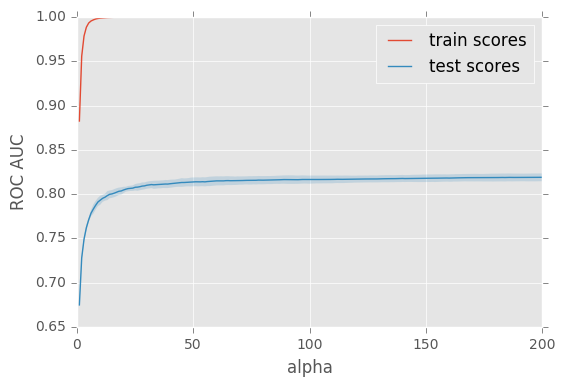

In [31]:
from sklearn.cross_validation import KFold
n = 200
kf = KFold(Xtr.shape[0],5)
rf = RandomForestClassifier(n_estimators=n, n_jobs=4, random_state = 7)
res_test = np.zeros(5*n).reshape((n,5))
res_train = np.zeros(5*n).reshape((n,5))
k = 0
for train_index, test_index in kf:
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = Xtr.loc[train_index], Xtr.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    yp_train = np.zeros(len(y_train))
    yp_test = np.zeros(len(y_test))
    for i in range(n):
        yp_train = yp_train + rf.estimators_[i].predict(X_train)
        yp_test = yp_test + rf.estimators_[i].predict(X_test)
        res_train[i,k] = roc_auc_score(y_train, yp_train)
        res_test[i,k] = roc_auc_score(y_test, yp_test)
    k = k + 1
    
n_est = np.arange(1,n+1)
def plot_with_err(x, data, **kwargs):
    mu = data.mean(axis = 1)
    std = data.std(axis = 1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(n_est, res_train, label='train scores')
plot_with_err(n_est, res_test,  label='test scores')
plt.xlabel('alpha')
plt.ylabel('ROC AUC')
plt.legend(loc='best')

print("Best params:", n_est[res_test.mean(axis = 1).argmax()])
print("Best cross validaton score", res_test.mean(axis = 1).max())

Изменилось ли качество у некоторых алгоритмов?

KNN:
    было:
    Best params: {'n_neighbors': 4}
    Best cross validaton score 0.640716052871
    стало:
    Best params: {'n_neighbors': 9}
    Best cross validaton score 0.804009741995
    
Decision:
    last:
    Best params: {'max_depth': 7}
    Best cross validaton score 0.841456219488
    now:
    Best params: {'max_depth': 7}
    Best cross validaton score 0.841502501819
SGD:
    last:
    Best params: {'loss': 'modified_huber'}
    Best cross validaton score 0.607100270291
    now:
    Best params: {'loss': 'log'}
    Best cross validaton score 0.807427790765
     
RF:
    last:
    Best params: 200
    Best cross validaton score 0.818905407547
    now:
    Best params: 200
    Best cross validaton score 0.818940781704

Видим, что деревьям безразницы на нормализацию признаков, потому что это операция не меняет их порядка, следовательно не влияет на алгоритм, так как дерево сечет пространство гиперплоскостями.
А вот для kNN и SGD нормализация была очень полезна прирост примерно на треть!

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке, сказано в разделе "Подбор гиперпараметров модели"

Выполним подбор параметров при нормализированных признаках

In [26]:
parameters = {'n_neighbors':np.arange(1,10,1),'metric':['euclidean','manhattan','chebyshev','minkowski']}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters, cv = 5,scoring='roc_auc')
clf.fit(Xtr, y)
print("KNN:")
print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

parameters = {'max_depth':np.arange(1,10,1),'criterion':['gini','entropy']}
decis = DecisionTreeClassifier(random_state=7)
clf = GridSearchCV(decis, parameters, cv = 5,scoring='roc_auc')
clf.fit(Xtr, y)
print("decisionTree")
print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

parameters = {'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],'penalty':['none', 'l2', 'l1', 'elasticnet']}
sgd = linear_model.SGDClassifier()
clf = GridSearchCV(sgd, parameters, cv = 5,scoring='roc_auc')
clf.fit(Xtr, y)
print("SGD")
print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

parameters = {'max_features':np.arange(0.1,1,0.1),'criterion':['gini','entropy']}
rf = RandomForestClassifier(n_estimators = 100,n_jobs=4,random_state=7)
clf = GridSearchCV(rf, parameters, cv = 5,scoring='roc_auc')
clf.fit(Xtr, y)
print("RF")
print("Best params:", clf.best_params_)
print("Best cross validaton score", clf.best_score_)

KNN:
Best params: {'n_neighbors': 9, 'metric': 'manhattan'}
Best cross validaton score 0.808328347251
decisionTree
Best params: {'max_depth': 8, 'criterion': 'entropy'}
Best cross validaton score 0.842409742088
SGD
Best params: {'penalty': 'none', 'loss': 'log'}
Best cross validaton score 0.810039876501
RF
Best params: {'max_features': 0.90000000000000002, 'criterion': 'entropy'}
Best cross validaton score 0.820578617635


Лучше всего показал себя Random Forest

Какой из алгоритмов имеет наилучшее качество? 

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [68]:
import time

In [69]:
t = time.time()
clf = KNeighborsClassifier(n_neighbors = 9)
clf.fit(Xtr, y)
print("KNN:",time.time() - t)


t = time.time()
clf = DecisionTreeClassifier(max_depth = 7,random_state=7)
clf.fit(Xtr, y)
print("decisionTree",time.time() - t)

t = time.time()
clf = linear_model.SGDClassifier(loss = 'log')
clf.fit(Xtr, y)
print("SGD",time.time() - t)


t = time.time()
clf = RandomForestClassifier(n_estimators = 100, n_jobs=4, random_state=7)
clf.fit(Xtr, y)
print("RF",time.time() - t)

KNN: 0.3397510051727295
decisionTree 0.059105634689331055
SGD 0.04121565818786621
RF 0.9951643943786621


Дольше всего отработал RF так как он строит много деревьев большой глубины, значит время постройки одного дерева надо умножать на количество деревьев

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавления этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [27]:
# выделим категориальные 
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [28]:
for c in categorical_columns:
    Xtr = pd.concat([Xtr, pd.get_dummies(data[c], prefix=c)],axis = 1)
    print(Xtr.shape)

(15347, 13)
(15347, 29)
(15347, 36)
(15347, 50)
(15347, 56)
(15347, 61)
(15347, 63)


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к нормированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

In [29]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import cross_val_score

In [30]:
clf = KNeighborsClassifier(n_neighbors = 9,metric =  'manhattan')
print("KNN:",cross_val_score(clf, Xtr, y,cv = 5).mean())


clf = DecisionTreeClassifier(max_depth = 8,criterion = 'entropy',random_state=7)
print("decisionTree",cross_val_score(clf, Xtr, y,cv = 5).mean())


clf = linear_model.SGDClassifier(loss = 'log',penalty = 'elasticnet')
print("SGD",cross_val_score(clf, Xtr, y,cv = 5).mean())


clf = RandomForestClassifier(n_estimators = 100,max_features =  0.9, criterion = 'entropy', n_jobs=4, random_state=7)
print("RF",cross_val_score(clf, Xtr, y,cv = 5).mean())

KNN: 0.828240118958
decisionTree 0.843422477374
SGD 0.830846343014
RF 0.847657578199


In [ ]:
#Было
KNN:
Best cross validaton score 0.808328347251
decisionTree
Best cross validaton score 0.842409742088
SGD
Best cross validaton score 0.813747455053
RF
Best cross validaton score 0.856006205381

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Качество DecisionTree и RF ухудшилось, наверно ему стало труднее работать с таким большим количеством признаков, нужно заного подбирать параметры, возможно нужно большее количество деревьев
У остальных произошел прирост, значит признаки несут в себе новую информацию

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

Decision Tree и RandomForest дали лучшие результаты, но они достаточно сильно похожи, поэтому для лучшей стабильности и разносторонности модели мы возьмем лучше RF и kNN чтобы улучшить качество. SGD лишь немного лучше kNN

In [71]:
from sklearn.cross_validation import KFold
kf = KFold(data.shape[0],5)
clf1 = KNeighborsClassifier(n_neighbors = 9,metric =  'manhattan')
clf2 = RandomForestClassifier(n_estimators = 100,max_features =  0.9, criterion = 'entropy', n_jobs=4, random_state=7)
setka = np.arange(0,1,0.2)
res_test = np.zeros(5*len(setka)).reshape((len(setka),5))
res_train = np.zeros(5*len(setka)).reshape((len(setka),5))
k = 0
for train_index, test_index in kf:
    t = time.time()
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = data.loc[train_index][numerical_columns], data.loc[test_index][numerical_columns]
    X_train2, X_test2 = Xtr.loc[train_index], Xtr.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf1.fit(X_train2, y_train)
    clf2.fit(X_train, y_train)
    
    for i in range(len(setka)):
        print(i,t - time.time())
        yp_train = setka[i]*clf1.predict_proba(X_train2) + (1-setka[i])*clf2.predict_proba(X_train)
        yp_test = setka[i]*clf1.predict_proba(X_test2) + (1-setka[i])*clf2.predict_proba(X_test)
        res_train[i,k] = roc_auc_score(y_train, yp_train[:,1])
        res_test[i,k] = roc_auc_score(y_test, yp_test[:,1])
    k = k + 1
    print(t-time.time())

TRAIN: 12277 TEST: 3070
0 -0.853764533996582
1 -32.23166799545288
2 -62.754854679107666
3 -91.762460231781
4 -119.44827580451965
-151.0008888244629
TRAIN: 12277 TEST: 3070
0 -0.8178598880767822
1 -27.983814477920532
2 -54.807050943374634
3 -81.83705425262451
4 -108.94788885116577
-135.71936869621277
TRAIN: 12278 TEST: 3069
0 -0.8101096153259277
1 -34.29374361038208
2 -64.96173739433289
3 -95.67191648483276
4 -125.5480101108551
-161.97269225120544
TRAIN: 12278 TEST: 3069
0 -1.293964147567749
1 -32.21451926231384
2 -62.84834384918213
3 -95.25071668624878
4 -126.59171533584595
-163.78057384490967
TRAIN: 12278 TEST: 3069
0 -1.196173906326294
1 -34.062384605407715
2 -67.19604301452637
3 -100.37662434577942
4 -132.57242059707642
-163.77845287322998


Best params: 0.6
Best cross validaton score 0.897674530806


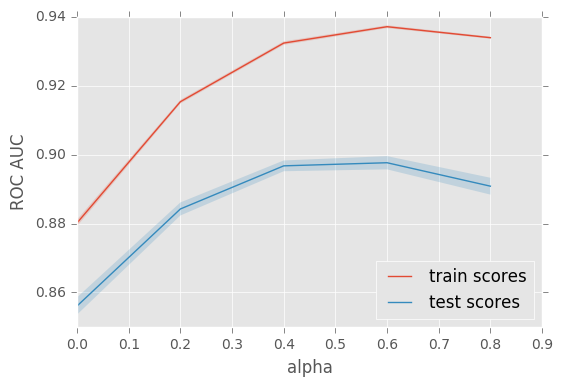

In [72]:
def plot_with_err(x, data, **kwargs):
    mu = data.mean(axis = 1)
    std = data.std(axis = 1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(setka, res_train, label='train scores')
plot_with_err(setka, res_test,  label='test scores')
plt.xlabel('alpha')
plt.ylabel('ROC AUC')
plt.legend(loc='best')

print("Best params:", setka[res_test.mean(axis = 1).argmax()])
print("Best cross validaton score", res_test.mean(axis = 1).max())

Видим, что комбинация различных моделей дает приличный прирост, я прошелся по сетке с шагом 0.2, скорее всего при более мелкой сетки, можно получить еще более хорошее качество. 

## Сравнение построенных моделей


**(1 балл)** Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

KNN — число соседей (n_neighbors) и метрика (metric)
DecisonTree — глубина дерева (max_depth) и критерий разбиения (criterion)
RandomForest — критерий разбиения в деревьях (criterion) и max_features (при фиксированном количестве деревьев, найденном ранее)
SGDClassifier — оптимизируемая функция (loss) и penalty

kNN:
работает лучше с нормализованными признаками,3 по скорости среди этих 4 алгоритмов, у модели есть несколько параметров таких как: число соседей и метрика,изменение параметров дают ощутимый прирост качества

DecisonTree:
Безразницы на нормализацию признаков,2 по скорости среди этих 4 алгоритмов, у модели есть несколько параметров таких как: глубина дерева и критерий разбиения,изменение параметров дают ощутимый прирост качества

RandomForest:
Безразницы на нормализацию признаков,самый медленный по скорости среди этих 4 алгоритмов, у модели есть несколько параметров таких как: число деревьев, максимальное количество фичей и критерий разбиения,изменение параметров дают ощутимый прирост качества, но например прирост числа деревьев в какой-то момент почти перестает давать прирост

SGDClassifier:
работает лучше с нормализованными признаками,самый быстрый по скорости среди этих 4 алгоритмов, у модели есть несколько параметров таких как: оптимизируемая функция (loss) и penalty,изменение параметров дают приятный прирост качества